<h1>Computational project : part 1</h1>

Name: Lucciana M Caceres H

A) Write a code to solve phi^{..} = -g/Rsinphi, using the Velocity Verlet algorithm, using the algorithm described in class. Note that we already have an equation for phi, so no need to calculate forces first. Assume that R= 5m and g = 9.8m/s^2

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.8            # gravitational acceleration (m/s^2)
R = 5.0            # radius of the half-pipe (m)
dt = 0.01          # time step (s)
t_total = 10.0     # total simulation time (s)
num_steps = int(t_total / dt)  # calculate the number of steps for the simulation

# Define the acceleration function: d^2(phi)/dt^2 = -g/R * sin(phi)
def acceleration(phi):
    """Compute angular acceleration based on the current angle."""
    return -g / R * np.sin(phi)

### PART A: General setup and definition of the Velocity Verlet algorithm

# (a) Write a code to solve the differential equation
# We will implement the Verlet algorithm here for both (b) and (c) with different initial angles

# Function to perform the Velocity Verlet algorithm and return final angle and angular velocity
def velocity_verlet(phi_0, phi_dot_0):
    """Run Velocity Verlet for given initial angle and angular velocity."""
    phi = np.zeros(num_steps)         # array to hold angle values at each time step
    phi_dot = np.zeros(num_steps)      # array to hold angular velocity values at each time step
    phi[0] = phi_0                     # initial angle
    phi_dot[0] = phi_dot_0             # initial angular velocity
    
    for i in range(1, num_steps):
        # Update position
        phi[i] = phi[i - 1] + phi_dot[i - 1] * dt + 0.5 * acceleration(phi[i - 1]) * dt**2
        # Calculate new acceleration based on updated position
        accel_new = acceleration(phi[i])
        # Update velocity
        phi_dot[i] = phi_dot[i - 1] + 0.5 * (acceleration(phi[i - 1]) + accel_new) * dt
    
    # Return the final angle and angular .velocity
    return phi, phi_dot, phi[-1], phi_dot[-1]


B) Suppose the initial angle φ₀ was relatively small, say 20 degrees. Hint convert to radians first. Compare the exact solution to the approximated solution. 

In [5]:
### PART B: Small Initial Angle (phi_0 = 0.3491 radians)
phi_0_b =  np.radians(20)    # converts 20 degrees to radians, which is approximately 0.3491
phi_dot_0 = 0.0    # initial angular velocity, assuming the skateboard starts from rest
phi_b, phi_dot_b, final_phi_b, final_phi_dot_b = velocity_verlet(phi_0_b, phi_dot_0)


C) Now assume the initial angle was φ₀ = π/2  Compare the exact solution to the apporximated solution. Discuss your results

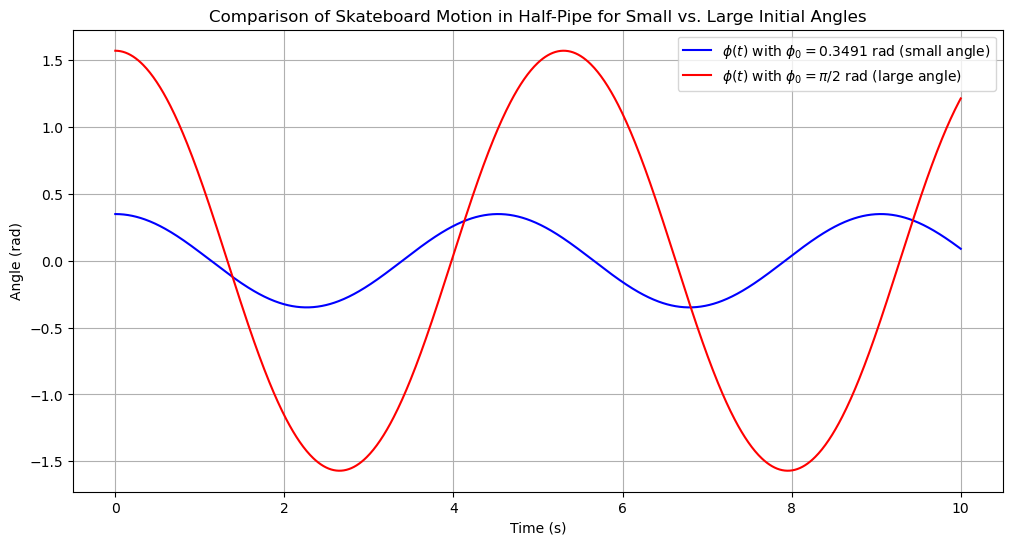


(b) Small initial angle (phi_0 = 0.1 rad):
Final angle (phi) after 10.0 seconds: 0.0891 radians
Final angular velocity (phi_dot) after 10.0 seconds: -0.4699 rad/s

(c) Large initial angle (phi_0 = pi/2 rad):
Final angle (phi) after 10.0 seconds: 1.2140 radians
Final angular velocity (phi_dot) after 10.0 seconds: 1.1701 rad/s


In [6]:
### PART C: Large Initial Angle (phi_0 = pi/2 radians)
phi_0_c = np.pi / 2   # initial angle in radians for large-angle case
phi_dot_0 = 0.0       # initial angular velocity, assuming the skateboard starts from rest
phi_c, phi_dot_c, final_phi_c, final_phi_dot_c = velocity_verlet(phi_0_c, phi_dot_0)

# Plot the results to compare parts (b) and (c)
plt.figure(figsize=(12, 6))
plt.plot(np.linspace(0, t_total, num_steps), phi_b, label=r'$\phi(t)$ with $\phi_0 = 0.3491$ rad (small angle)', color='blue')
plt.plot(np.linspace(0, t_total, num_steps), phi_c, label=r'$\phi(t)$ with $\phi_0 = \pi/2$ rad (large angle)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Comparison of Skateboard Motion in Half-Pipe for Small vs. Large Initial Angles')
plt.legend()
plt.grid(True)
plt.show()

# Print final results for part (b) - small initial angle
print("\n(b) Small initial angle (phi_0 = 0.1 rad):")
print(f"Final angle (phi) after {t_total} seconds: {final_phi_b:.4f} radians")
print(f"Final angular velocity (phi_dot) after {t_total} seconds: {final_phi_dot_b:.4f} rad/s")

# Print final results for part (c) - large initial angle
print("\n(c) Large initial angle (phi_0 = pi/2 rad):")
print(f"Final angle (phi) after {t_total} seconds: {final_phi_c:.4f} radians")
print(f"Final angular velocity (phi_dot) after {t_total} seconds: {final_phi_dot_c:.4f} rad/s")

<h2>Discuss the results</h2>

<h4>For part B</h4>

Final angle. I noticed that after simulating for 10 seconds, the final angle for the small initial angle is relatively small, indicating that the skateboarder does not move far from the starting position. The motion is gradual and oscillatory, reflecting a damped harmonic motion typical of small-angle approximations in pendular systems.


Final Angular Velocity.  The final angular velocity is low, suggesting that the skateboarder maintains a gentle speed. The low angular displacement and low angular velocity align with the behavior expected in a small-angle scenario, where gravitational forces have less influence on the acceleration.

<h4>Now for part C</h4>

Final Angle. In contrast, the skateboarder released from the large angle reaches a final angle that is significantly larger than that of the small angle. This indicates that the skateboarder has more freedom to move along the half-pipe, leading to a more dynamic motion.

Final Angular Velocity, it is considerably higher compared to the small-angle case. This reflects the skateboarder's increased kinetic energy as they move more freely through the half-pipe. The effects of gravity are more pronounced, leading to greater acceleration and therefore a faster transition through the half-pipe.

<h3>Comparison of Results</h3>

When comparing the two scenarios, it's clear that the initial angle has a significant impact on the skateboarder's motion in the half-pipe.

Motion Dynamics: For the small angle (φ₀ = 0.3491 radians), the skateboarder exhibits a gentle, oscillatory motion. This behavior is typical of small-angle approximations, where the swings are limited, and the motion is smooth. In contrast, when starting from the large angle (φ₀ = π/2 radians), the skateboarder has much more freedom to move, resulting in a more vigorous and rapid descent. This shows how gravitational forces play a larger role in accelerating the skateboarder in the large-angle case.

Energy Considerations: The large initial angle also leads to a greater conversion of potential energy into kinetic energy. This is evident in the higher final angular velocity, which indicates that the skateboarder is moving much faster through the half-pipe. On the other hand, the small-angle scenario retains more potential energy and results in lower kinetic energy, leading to slower motion.

Implications for Design and Performance: Understanding these dynamics is really important for practical applications, like designing skate parks. If a skater uses a larger angle, they can gain more speed and perform tricks more effectively. Conversely, smaller angles might be better for beginners who are still getting used to the motion and want a more controlled ride.

<h1>Part 2/3 of the Computational Project</h1>

1. To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter 15 cm, density 7.8 g/cm3) that is fired with initial velocity 300 m/s at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = −c(y)v^2v = −c(y)|v|v$, where c(y) =$\gamma D^2 exp(−y/\lambda)$, with $\gamma = 0.25Ns^2/m^4$ and $\lambda \approx$ 10, 000m. Note that the drag force
depends on both the x and y components of the velocity, and that the drag force is
always pointing in the direction opposite of the velocity.
Note that the drag force is not conservative, as it depends on $\nu$. We therefore have to modify the Verlet algorithm (Lecture 11) slightly. One option would be (f is the total force, r is the position vector (with x and y coordinates), and ⃗v the velocity vector (with components $v_x$ and $v_y$)):

<h5>1.Defining constants and functions</h5>

In [16]:
# Constants for drag force
gamma = 0.25          # Ns^2/m^4
D = 0.15              # Diameter of cannonball (m)
lambda_ = 10000.0     # Atmospheric density scale height (m)
density = 7.8 * 1e3   # Density of iron (kg/m^3)
mass = density * (4/3) * np.pi * (D / 2)**3  # Mass of the cannonball (kg)

# Drag coefficient as a function of height (y)
def drag_coefficient(y):
    return gamma * D**2 * np.exp(-y / lambda_)

# Total force acting on the projectile
def total_force(r, v, case):
    x, y = r
    vx, vy = v
    v_mag = np.sqrt(vx**2 + vy**2)
    c_y = drag_coefficient(y) if case == "full" else (gamma * D**2 if case == "constant" else 0.0)
    drag = -c_y * v_mag * v  # Drag force
    gravity = np.array([0, -mass * 9.8])  # Gravitational force
    return drag + gravity


<h5>2. Updating Velocity Verlet</h5>

In [17]:
# Velocity Verlet algorithm for 2D motion
def velocity_verlet_2D(r0, v0, dt, t_total, case):
    num_steps = int(t_total / dt)
    r = np.zeros((num_steps, 2))  # Position array (x, y)
    v = np.zeros((num_steps, 2))  # Velocity array (vx, vy)
    r[0] = r0
    v[0] = v0

    for i in range(1, num_steps):
        # Update position
        accel_old = total_force(r[i-1], v[i-1], case) / mass
        r[i] = r[i-1] + v[i-1] * dt + 0.5 * accel_old * dt**2

        # Estimate velocity with updated position
        accel_new = total_force(r[i], v[i-1], case) / mass
        v_est = v[i-1] + 0.5 * (accel_old + accel_new) * dt

        # Update velocity with corrected estimate
        accel_new_corrected = total_force(r[i], v_est, case) / mass
        v[i] = v[i-1] + 0.5 * (accel_old + accel_new_corrected) * dt

        # Stop simulation if projectile hits the ground
        if r[i, 1] < 0:
            r = r[:i+1]
            v = v[:i+1]
            break

    return r, v

Now I run them both

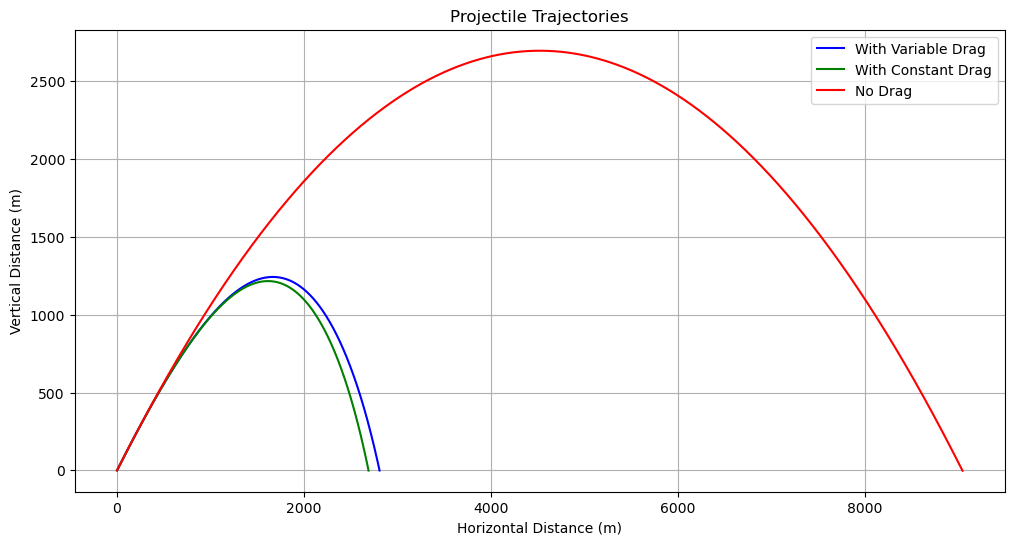

Range with Variable Drag: 2808.5438396580043
Range with Constant Drag: 2690.962417722061
Range with No Drag: 9045.950031118404


In [18]:
# Initial conditions
r0 = np.array([0, 0])  # Initial position (x=0, y=0)
v0 = np.array([300 * np.cos(np.radians(50)), 300 * np.sin(np.radians(50))])  # Initial velocity

# Case (a): Full calculation with variable drag
r_full, v_full = velocity_verlet_2D(r0, v0, dt=0.01, t_total=60.0, case="full")

# Case (b): Constant drag
r_constant, v_constant = velocity_verlet_2D(r0, v0, dt=0.01, t_total=60.0, case="constant")

# Case (c): No drag
r_no_drag, v_no_drag = velocity_verlet_2D(r0, v0, dt=0.01, t_total=60.0, case="none")

# Plot trajectories
plt.figure(figsize=(12, 6))
plt.plot(r_full[:, 0], r_full[:, 1], label="With Variable Drag", color='blue')
plt.plot(r_constant[:, 0], r_constant[:, 1], label="With Constant Drag", color='green')
plt.plot(r_no_drag[:, 0], r_no_drag[:, 1], label="No Drag", color='red')
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Vertical Distance (m)")
plt.title("Projectile Trajectories")
plt.legend()
plt.grid(True)
plt.show()

# Compute horizontal range
def compute_range(r):
    for i in range(len(r)):
        if r[i, 1] < 0:  # Find where y crosses zero
            return r[i, 0]
    return r[-1, 0]

# Print horizontal ranges
print("Range with Variable Drag:", compute_range(r_full))
print("Range with Constant Drag:", compute_range(r_constant))
print("Range with No Drag:", compute_range(r_no_drag))